### Note: notes taken from TROBEC, Roman et al. - Introduction To Parallel Computing(2018). Images here are taken from the book!

# Chapter 2 - Overview of Parallel Systems

## Concepts

**Sequential Algorithm:** performs one operation in each step.

**Parallel Algorithm:** performs multiple operations in a single step. The operations are performed by **processing units**(**PU**'s).

**Parallel Execution Time(Parallel Runtime):** the time that a parallel machine takes to run a parallel algorithm

**Speedup:** how many times is the parallel runtime faster than its sequential counterpart.

**Efficiency:** **average** contribution of each PU $p$ to the speedup.

**Random Access Machine:** consists of a **processing unit** and a **memory**. The memory is a sequence $m_0 m_1 ... m_i$ of memory locations of the same size, with $i$(the **address** of $m_i$) **potentially infinite**. We also have **registers** $r_1 ... r_n$, that are locations in the PU's(think about processor's caches), which can be of two types: **Program Counter**($pc$) and **Accumulator**($a$). **Program Counter** stores the address in memory of an instruction to be executed, whereas **Accumulator** executes the instruction. A **Program**, thus, is a **finite** sequence of  instructions.

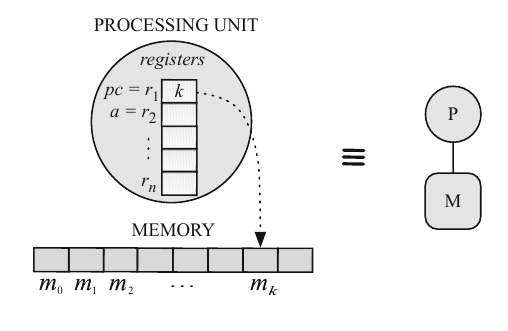

Three **multiprocessor** models generalizes **RAM** machines:

1. **Parallel Random Access Machine(PRAM)**
2. **Local Memory Machine(LMM)**
3. **Modular Memory Machine(MMM)**

**PRAM:** has $p$ processing units and _unbounded_ shared memory. Any PU can request and access in one step any location in memory. But keep in mind: this one step access is **unrealistic**, and can lead to **data races** and **undefined behavior**. PRAM has three variants, which differ in whether or not reading and writing are exclusive or concurrent.

* **Exclusive Read Exclusive Write(EREW-PRAM):** does not support simultaneous reading and writing to the **same** memory location.
* **Concurrent Read Exclusive Write(CREW-PRAM):** allows simultaneous reading, but not writing.
* **Concurrent Read Concurrent Write(CRCW-PRAM):** allows both simultaneous reading and writing. To avoid undefined behavior, has four subtypes:

1. **Consistent:** whenever more than one PU attempts to write to a same memory location, the **same** value must be written.
2. **Arbitrary:** whenever more than one PU attempts to write to a same memory location, **only one** of them will **succeed**.
3. **Priority:** whenever more than one PU attempts to write to a same memory location, **only the one** with the **highest priority** will succeed.
4. **Fusion:** whenever more than on PU attempts to write to a same memory location, it is assumed that there is a commutative and associative operation $\circ$ that is applied to all values $v_1, ..., v_k$ that each PU attempts to write to the location. After $\circ$ is applied to each value, the result of the concatenation $v_1 \circ v_2 \circ ... \circ v_n$ is written to the memory location.

    NOTE: No, I also did no get the motivation behind this.

**LMM:** $p$ PU's, each with their own **local memory**, which can be accessed directly(in unit time) by their corresponding PU's, and indirectly, through a **memory request**, by other PU's. The memory requests are sent through an **interconnection network** that connects all PU's. The speed of a memory requests depends on the network's capability and the amount of requests.

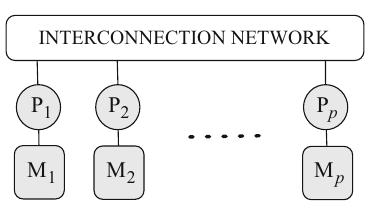

**MMM:** $p$ PU's, $m$ **memory modules**(not local to the PU's), and a **common interconnection network** connecting the PU's to the memory modules. It is assumed that the time any PU takes to access a module is uniform, and the time depends on the network's capability and the amount of accesses to the same module.

**Performance Properties of Interconnection Networks:**

1. channel bandwidth: theoretical amount of data that can be communicated through a channel in an amount of time. Requires a **model of communication** to determine the latter.
2. bisection bandwidth: max-flow min-cut. The bisection bandwidth is the min-cut
3. latency: time required for a packet to go from node $a$ to node $b$

**Definition 2.1, p.34: Polylogarithmic function -** if, for some $k \geq 1$, we have a

$$ f(n) = a_k (log(n))^k + a_{k-1} (log(n))^{k-1} + ... + a_1 (log(n))^1 + a_0 $$
then we say that $f$ is **polylogarithmic**.

**Definition 2.2, p.34:** define **NC** to be the class of problems solvable in polylogarithmic time on PRAM with **polynomial number of processing units**. **NC** is both **robust**(does not depend on the type of PRAM) and contains the problems that are **efficiently parallelizable**

## Mathematics

**Sequential Runtime:** Let the **sequential runtime** be: $T_{seq}$.

Let $C(p):=$ a parallel computer **C** containing **p** processing units.

**Parallel Runtime:** Denote the **parallel runtime** be as: $T_{par}$.s

Notice 1(N1): a parallel machine can simulate a sequential machine by limiting the p PU's running an algorithm
P to one. Similarly, If P is parallel, a sequential machine can simulate a parallel machine simply by running
sequentially the parallel instructions, but its runtime will not match the parallel runtime, because we are
assuming here that P is parallel. I.e.: $ T_{par} \leq T_{seq} $. 

Note: about N1, there **might** be some cases where a parallel machine running a sequential algorithm in parallel performs worse than a sequential machine. The inequality above is taken as given by the **authors**  without further justification.

**Speedup:**

$$ S := \frac{T_{sec}}{T_{par}} $$

Notice 2(N2): By N1 above, $ S \geq 1 $. 

**Efficiency:**

$$ E := \frac{S}{p} $$

**Theorem 2.1, p.16:** every algorithm for solving a problem $\Pi$ on the CRCW-PRAM(p) is at most O(log(p))-times faster than the fastest algorithm for solving the same problem on the EREW_PRAM(p).

**Topological Properties:**

1. node degree: number of connections that a node has
2. regularity: same node degree
3. symmetry: if it is possible to construct a function $f: N(G) \rightarrow N(G)$ s.t., for any nodes $a, b, c, d \in N(G)$ with $ab, cd \in E(G)$, $f(a) = c, f(b) = d$, then the graph is said to be symmetric. The idea here is that, if there are two nodes that are connected($ab$), then we can transform both nodes in such a way that the resulting transformations are also connected($cd$). This means that it is possible to "mimic" the behavior of any node($c$) by modifying another one($a$), and this resulting modification($c$) will be linked to a node($d$) that was also a modification of a node($b$) linked to the original($a$).
4. hop count: number of nodes in a path between two nodes
5. diameter: consider all paths between two nodes $a$ and $b$. Take its minimum hop count. For all pairs of nodes, create a set with their hop minimum hop counts. Define diameter as the maximum element of the latter set.
6. path diversity: amount of paths between every pair of nodes
7. expansion scalability: either the capability to handle a growing amount of work, or how much can a system be enlarged to handle that growth.

**Brent's Theorem, p.36:** let $T_{par, R}(P)$ be the runtime that a PRAM R with $p$ PU's takes to run a program $P$. Similarly, let $T_{par, M}(P)$ be the runtime that a PRAM M with an undefined, but greater than $p$, PU's takes to run the same program $P$ in $W$(work) operations. Then, according to **Brent's Theorem**, we have that

$$ T_{par, R}(P) = O( \frac{W}{p} + T_{par, M}(P)) $$

i.e., $R$ will take at most the same time that $M$ takes plus a fraction of the amount of work it performs. This is not that intuitive at first, because how can a machine with **FEWER** PU's take **AT MOST** the amount of time a machine with more PU's than it? But, keep in mind the $\frac{W}{p}$ here. It means that decreasing the amount of processors will only hamper performance up to the fraction! We will see why with **Amdahl's Law**.

**Amdahl's Law, p.40:** let the runtime of a parallel execution of a program $P$ be $T_{par}(P) = T_{seq}(P_1) + \frac{1}{s} T_{seq}(P_2)$, where $P$ is a program, $P_1$ it's part that _does not_ benefit from parallelization, and $P_2$ be $P's$ parallelizable part. Here, since $P_2$ benefits from multiple PU's, its sequential runtime is sped up by a factor $s$. Now, let $b = \frac{T_{seq}(P2)}{T_{seq}(P)}$, i.e., $b$ represents how much the parallelization of $P_2$ contributes to $P$. We have **Amdahl's Law**

$$ S(P) = \frac{1}{1 - b + \frac{b}{s}} $$

This shows us that the runtime is bounded below by the part of the program that cannot be parallelized($P_1$). This also means that the speedup cannot be larger than the parte of the program that benefits from parallelization($P_2$).

NOTE: I only cover this chapter of Trobec et al.(2018), since I will focus on CUDA, but from now on they use OpenCL instead of CUDA. I will turn to Pacheco(2022) and put notes taken from it on another jupyter notebook.